<a href="https://colab.research.google.com/github/aditya-kurup/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q imbalanced-learn xgboost scikit-learn matplotlib seaborn pandas numpy kaggle


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:
from google.colab import files
uploaded = files.upload()  # choose your kaggle.json when prompted
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Install Kaggle if not installed
!pip install -q kaggle

# Make sure kaggle.json is uploaded already
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Download and unzip dataset safely
!kaggle datasets download -d mlg-ulb/creditcardfraud -p /content
!unzip -o /content/creditcardfraud.zip -d /content

# List the extracted files
!ls -l /content


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.77GB/s]
Archive:  /content/creditcardfraud.zip
  inflating: /content/creditcard.csv  
total 214848
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Sep 20  2019 creditcardfraud.zip
-rw-r--r-- 1 root root        67 Oct 22 08:41 kaggle.json
drwxr-xr-x 1 root root      4096 Oct 20 20:02 sample_data


inspecting the dataset

In [ ]:
import pandas as pd
import pandas as pd

df = pd.read_csv('/content/creditcard.csv', encoding='latin1')
print("Shape of dataset:", df.shape)
print(df['Class'].value_counts())
df.head()

print("Shape of dataset:", df.shape)
print(df['Class'].value_counts())
df.head()


Shape of dataset: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Shape of dataset: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Exploratory Data Analysis

Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Statistical summary:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   


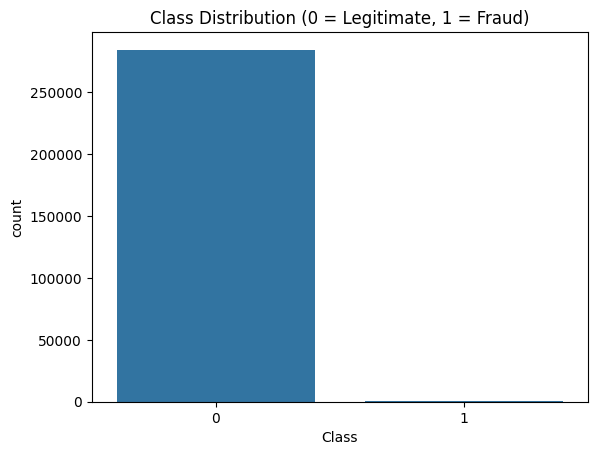

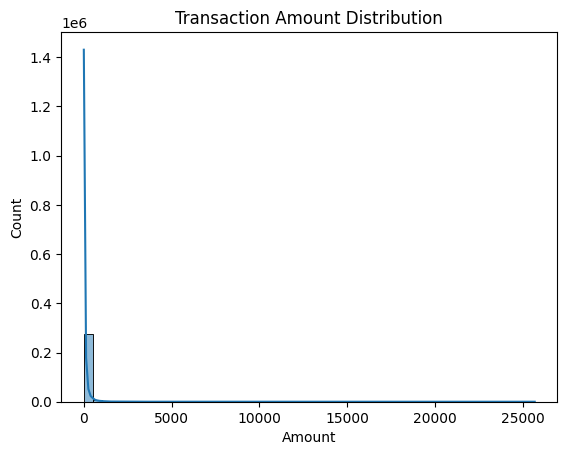

In [ ]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Quick statistical summary
print("\nStatistical summary:\n", df.describe())

# Class distribution plot

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")

plt.show()

# Transaction Amount distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


The above cell shows:


*   Missing values info
*   Basic statistics
*   Visualization of the imbalance
*   Distribution of the transaction amounts







Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
df = df.drop(['Amount', 'Time'], axis=1)

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train: (227845, 30)
X_test: (56962, 30)
y_train distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
y_test distribution:
 Class
0    56864
1       98
Name: count, dtype: int64


high class imbalance: only 394 frauds in training and 98 in testing.

Handle Class Imbalance using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("After SMOTE, y_train_res distribution:\n", pd.Series(y_train_res).value_counts())


After SMOTE, y_train_res distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


We will train and compare three models on the balanced training data:

*   Logistic Regression (baseline)
*   Random Forest (ensemble method)
*   XGBoost (advanced gradient boosting)


We’ll evaluate them using Recall, Precision, F1-score, ROC-AUC, since fraud detection is an imbalanced classification problem.

logistic regression

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
 [[55406  1458]
 [    8    90]]
ROC-AUC: 0.9698482164390798


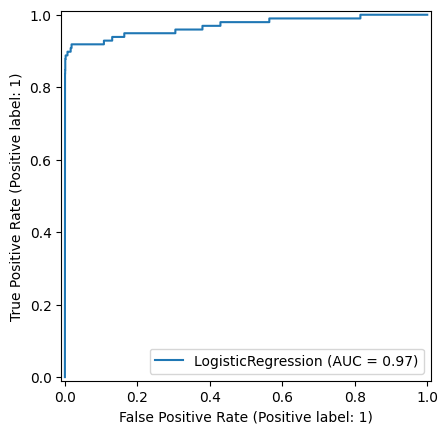

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

# Plot ROC curve
RocCurveDisplay.from_estimator(lr, X_test, y_test)


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56849    15]
 [   17    81]]
ROC-AUC: 0.9648747494918057


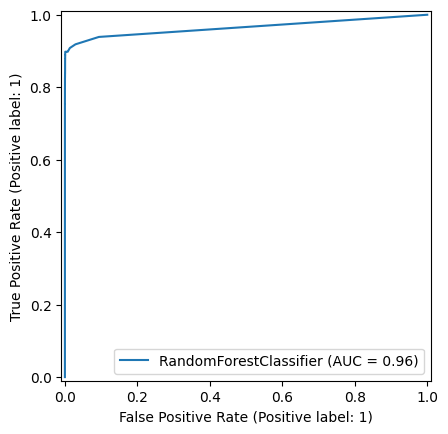

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

rf.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

# Plot ROC curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:45:10] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:45:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [08:45:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/

=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.90      0.53        98

    accuracy                           1.00     56962
   macro avg       0.69      0.95      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56718   146]
 [   10    88]]
ROC-AUC: 0.9743105282349294


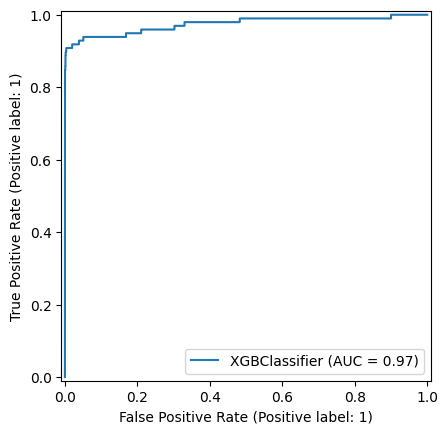

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize XGBoost with GPU
xgb_model = xgb.XGBClassifier(
    n_estimators=100,         # number of trees
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='gpu_hist',
    gpu_id=0,
    random_state=42,
    scale_pos_weight=1
)

# Train on balanced training set
xgb_model.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

# Plot ROC curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)


comparing alll models


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Dictionary to store results
results = {}

# 1️⃣ Logistic Regression
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]
results['Logistic Regression'] = {
    'Precision': classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, y_prob_lr),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr)
}

# 2️⃣ Random Forest
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
results['Random Forest'] = {
    'Precision': classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}

# 3️⃣ XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
results['XGBoost'] = {
    'Precision': classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision'],
    'Recall': classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall'],
    'F1-score': classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score'],
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}

# Display metrics
for model_name, metrics in results.items():
    print(f"=== {model_name} ===")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")


=== Logistic Regression ===
Precision: 0.0581
Recall: 0.9184
F1-score: 0.1094
ROC-AUC: 0.9698
Confusion Matrix:
[[55406  1458]
 [    8    90]]

=== Random Forest ===
Precision: 0.8438
Recall: 0.8265
F1-score: 0.8351
ROC-AUC: 0.9649
Confusion Matrix:
[[56849    15]
 [   17    81]]

=== XGBoost ===
Precision: 0.3761
Recall: 0.8980
F1-score: 0.5301
ROC-AUC: 0.9743
Confusion Matrix:
[[56718   146]
 [   10    88]]



roc curve for all models

<Figure size 800x600 with 0 Axes>

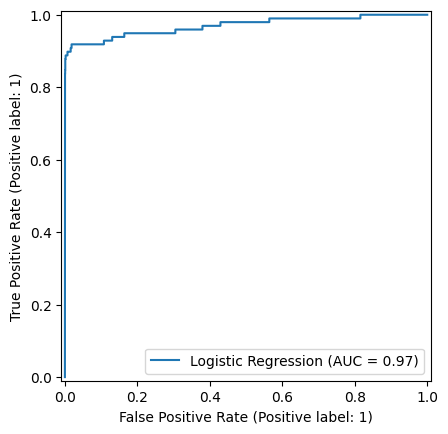

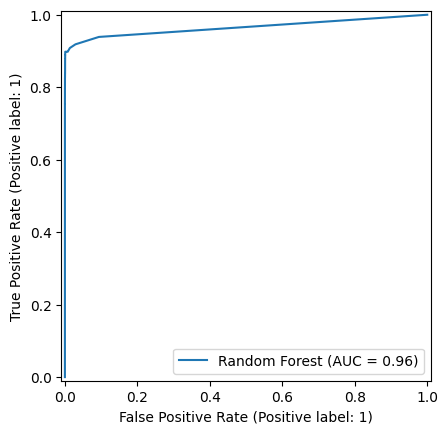

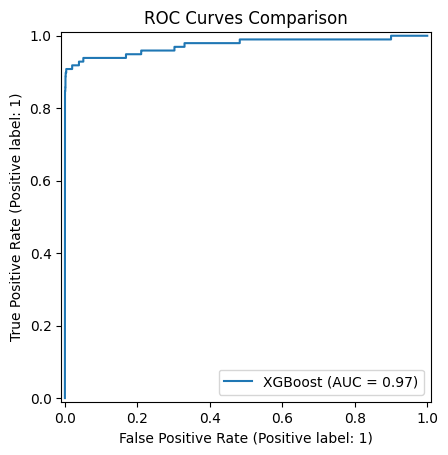

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, name="XGBoost")
plt.title("ROC Curves Comparison")
plt.show()


1. Logistic Regression
Pros: Fast, interpretable, decent recall (detects most frauds).
Cons: Very low precision → many false positives (legitimate transactions flagged as fraud).
Use case: Baseline model or for quick checks.
2. Random Forest
Pros: Better balance of recall and precision than logistic regression, robust to feature correlations.
Cons: Slow on large datasets, especially CPU-bound (sklearn RF doesn’t use GPU).
Use case: Good for offline batch detection; not ideal for real-time if dataset is huge.
3. XGBoost (GPU)
Pros:
Very high recall and ROC-AUC → catches most frauds.
Better precision than logistic regression → fewer false positives.
Fast training on GPU (T4 in Colab).
Cons: Slightly more complex to tune than Random Forest.
Use case: Best for production, especially when you want to minimize false negatives and train efficiently on large datasets.
✅ Recommendation
Deploy XGBoost with GPU for your credit card fraud detection model.
Keep Logistic Regression as a lightweight baseline.
Use Random Forest only if GPU isn’t available or for interpretability analysis.


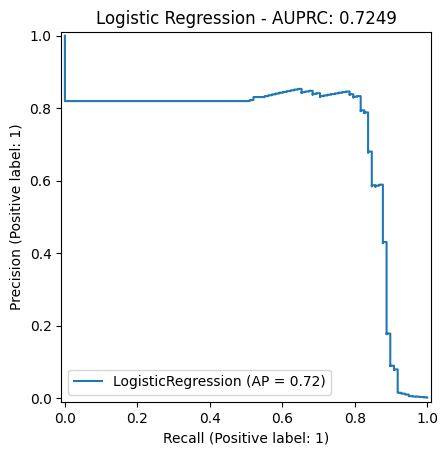

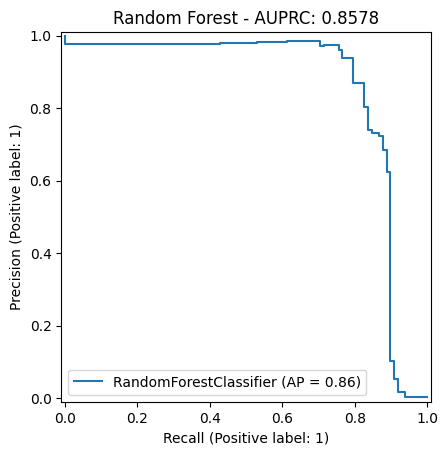

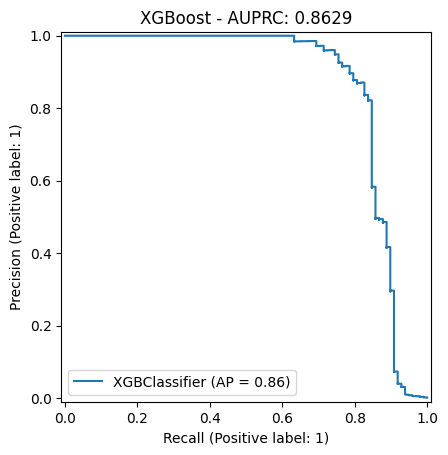

AUPRC Scores:
Logistic Regression: 0.7249
Random Forest: 0.8578
XGBoost: 0.8629


In [ ]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay

# Logistic Regression
auprc_lr = average_precision_score(y_test, y_prob_lr)
PrecisionRecallDisplay.from_estimator(lr, X_test, y_test)
plt.title(f"Logistic Regression - AUPRC: {auprc_lr:.4f}")
plt.show()

# Random Forest
auprc_rf = average_precision_score(y_test, y_prob_rf)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title(f"Random Forest - AUPRC: {auprc_rf:.4f}")
plt.show()

# XGBoost
auprc_xgb = average_precision_score(y_test, y_prob_xgb)
PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title(f"XGBoost - AUPRC: {auprc_xgb:.4f}")
plt.show()

# Print AUPRC summary
print(f"AUPRC Scores:\nLogistic Regression: {auprc_lr:.4f}\nRandom Forest: {auprc_rf:.4f}\nXGBoost: {auprc_xgb:.4f}")


AUPRC directly focuses on the positive (minority) class:

Precision: Out of all predicted frauds, how many were actually frauds?

Recall: Out of all actual frauds, how many were caught?




#### ** ROC Curve (Receiver Operating Characteristic)**

The ROC curve plots **True Positive Rate (TPR)** against **False Positive Rate (FPR)**.

$$
TPR = \frac{TP}{TP + FN}.
$$
It tells you how many of the actual positives were correctly detected.
$$
FPR = \frac{FP}{FP + TN}
$$
Out of all actual negatives, how many did the model incorrectly mark as positive?

area under ROC:
It measures how well the model distinguishes between positive and negative classes.

---

#### ** Precision–Recall Curve (PRC)**

The PRC plots **Precision** against **Recall**.

$$
Precision = \frac{TP}{TP + FP}
$$
Out of all the instances the model predicted as positive, how many were actually positive?
$$
Recall = \frac{TP}{TP + FN}
$$


Area under PRC:
It focuses on the **positive (minority) class**, making it more useful for **imbalanced datasets**.


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.88      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56765    99]
 [   12    86]]
ROC-AUC: 0.9535882427675628


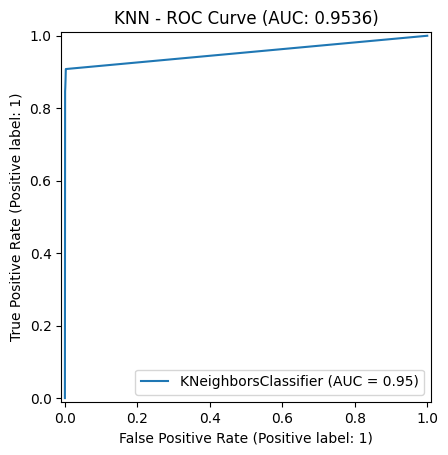

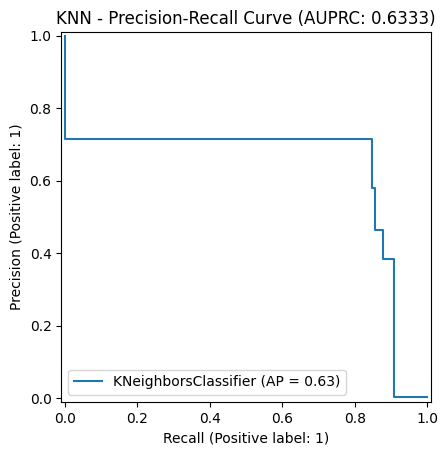

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay

# Train KNN (use k=5 as default)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_res, y_train_res)

# Predict
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate
print("=== K-Nearest Neighbors ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
roc_knn = roc_auc_score(y_test, y_prob_knn)
print("ROC-AUC:", roc_knn)

# ROC Curve
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title(f"KNN - ROC Curve (AUC: {roc_knn:.4f})")
plt.show()

# Precision-Recall Curve
auprc_knn = average_precision_score(y_test, y_prob_knn)
PrecisionRecallDisplay.from_estimator(knn, X_test, y_test)
plt.title(f"KNN - Precision-Recall Curve (AUPRC: {auprc_knn:.4f})")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, average_precision_score, PrecisionRecallDisplay

# Train SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)

# Predict
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Support Vector Machine ===")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
roc_svm = roc_auc_score(y_test, y_prob_svm)
print("ROC-AUC:", roc_svm)

# ROC Curve
RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.title(f"SVM - ROC Curve (AUC: {roc_svm:.4f})")
plt.show()

# Precision-Recall Curve
auprc_svm = average_precision_score(y_test, y_prob_svm)
PrecisionRecallDisplay.from_estimator(svm, X_test, y_test)
plt.title(f"SVM - Precision-Recall Curve (AUPRC: {auprc_svm:.4f})")
plt.show()
